In [14]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, lognorm, gamma, pareto, norm
from fitter import Fitter

# Cargar tus datos
# Reemplaza 'tu_archivo.csv' y 'columna_precio' con tu archivo y columna reales.
data = pd.read_csv('portugal_housing.csv')
# data.drop(index=58801)
# data.info()

# Eliminar filas donde "Price" sea nulo
data = data.dropna(subset=["Price"])

# Filtrar filas donde "Price" sea menor a 1650000
data = data[data["Price"] < 1102920]

# data.sort_values('Price', ascending=False).head(2000).groupby("Type").count()

C:\Users\pablo\AppData\Local\Temp\ipykernel_21500\668713289.py:11: DtypeWarning: Columns (6,7,9,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('portugal_housing.csv')


In [11]:
# data.info()

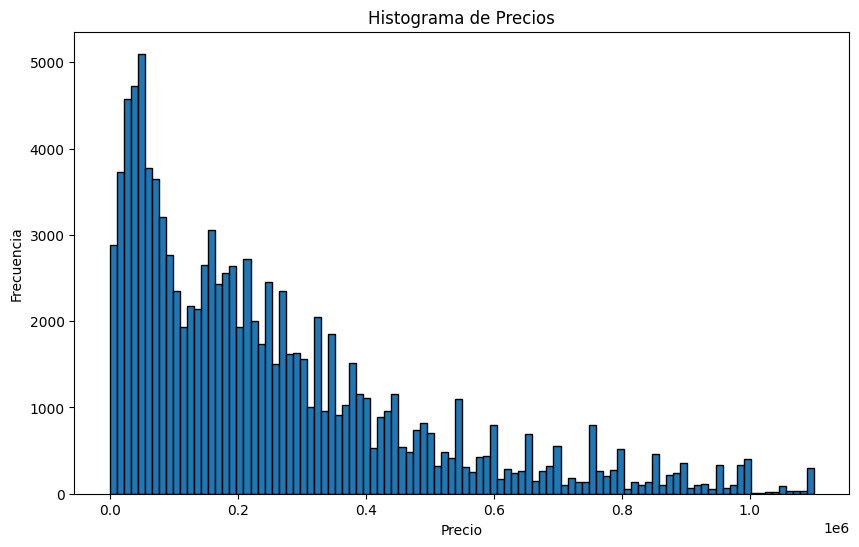

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins= 100, edgecolor='black')  # Ajusta el número de bins según lo que necesites
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

AIC es un criterio de seleccion. Prueba varia 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsb,8.227747e-12,2915.185531,2953.555434,0.055411,0.040638,8.232207e-156
pearson3,8.988756e-12,2935.518503,2964.295931,0.049985,0.031891,4.144174e-96
gamma,8.988756e-12,2935.518521,2964.295948,0.049985,0.031891,4.144533e-96
erlang,8.988756e-12,2935.518501,2964.295928,0.049985,0.031891,4.143627e-96
weibull_min,9.155211e-12,2935.732271,2964.509698,0.050494,0.033799,6.670713e-108


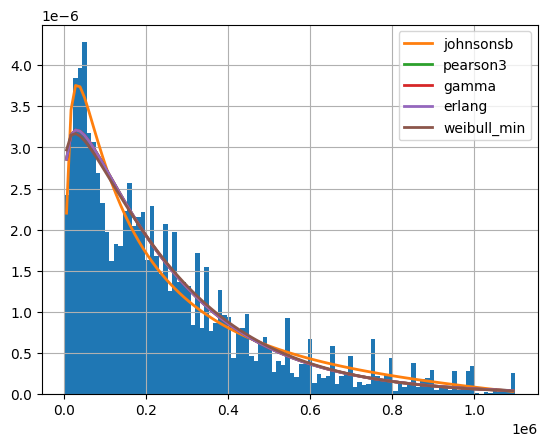

In [19]:
from fitter import Fitter, get_distributions
data = data[data["Price"].notnull()]

fitter = Fitter(
    data["Price"],
    distributions=get_distributions()  # Ajustar a las distribuciones más comunes
)
fitter.fit()
fitter.summary()

In [ ]:
precios = data['Price']

# Check not nulls
precios = precios.dropna()


In [ ]:

precios.isnull().sum()

precios[precios > 2000000].count() / len(precios)
# precios

# Para este ejemplo, generaremos datos simulados log-normales (reemplázalos con tus datos reales).
# np.random.seed(42)
# precios = np.random.lognormal(mean=12, sigma=0.5, size=1000)  # Sustituye con tu columna de precios reales


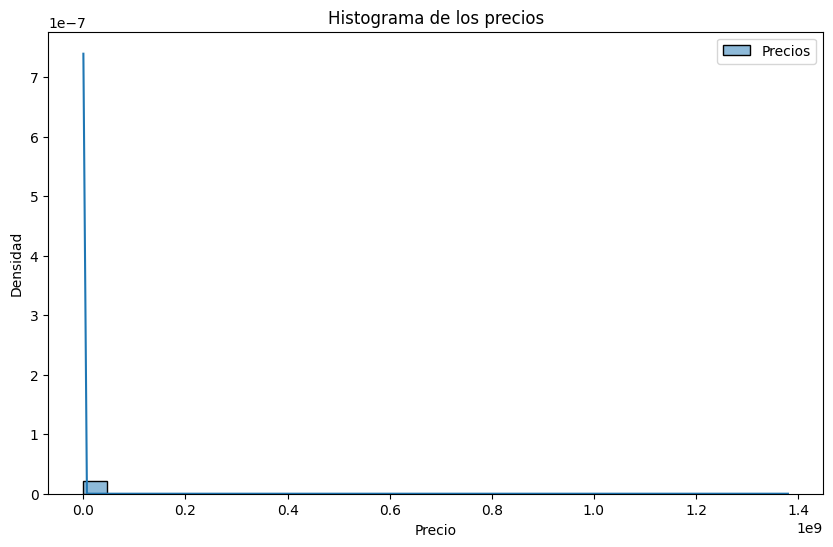

In [16]:

# 1. Visualización inicial
plt.figure(figsize=(10, 6))
sns.histplot(precios, kde=True, bins=30, stat="density", label="Precios")
plt.title("Histograma de los precios")
plt.xlabel("Precio")
plt.ylabel("Densidad")
plt.legend()
plt.show()


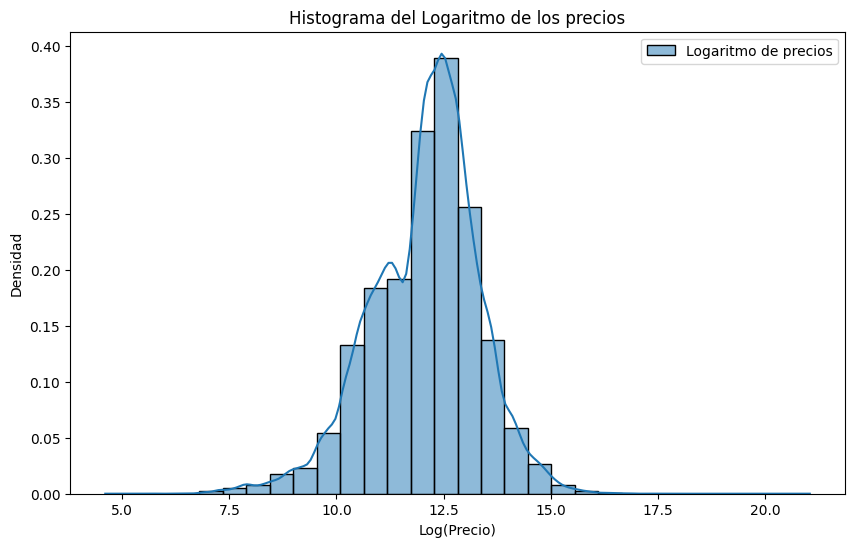

In [17]:

# 2. Transformación logarítmica (opcional)
log_precios = np.log(precios)

plt.figure(figsize=(10, 6))
sns.histplot(log_precios, kde=True, bins=30, stat="density", label="Logaritmo de precios")
plt.title("Histograma del Logaritmo de los precios")
plt.xlabel("Log(Precio)")
plt.ylabel("Densidad")
plt.legend()
plt.show()


In [18]:

# 3. Pruebas estadísticas de normalidad
print("Pruebas estadísticas de normalidad en los precios:")
shapiro_test = shapiro(precios)
print(f"Shapiro-Wilk Test: Estadístico={shapiro_test.statistic}, p-valor={shapiro_test.pvalue}")

print("\nPruebas estadísticas de normalidad en log(Precios):")
shapiro_test_log = shapiro(log_precios)
print(f"Shapiro-Wilk Test para log(Precios): Estadístico={shapiro_test_log.statistic}, p-valor={shapiro_test_log.pvalue}")


Pruebas estadísticas de normalidad en los precios:
Shapiro-Wilk Test: Estadístico=0.012842438376123422, p-valor=6.857823866576539e-188

Pruebas estadísticas de normalidad en log(Precios):
Shapiro-Wilk Test para log(Precios): Estadístico=0.9852921133442953, p-valor=3.870846257407757e-68


c:\Users\pablo\Documents\GitHub\analisis_salud_mental\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 114379.
  res = hypotest_fun_out(*samples, **kwds)



Mejores distribuciones ajustadas:
         sumsquare_error           aic           bic  kl_div  ks_statistic  \
norm        2.009372e-15  3.724966e+06  3.724985e+06     inf      0.464634   
lognorm     5.194569e-15  9.027858e+03  9.056799e+03     inf      0.049408   
pareto      5.220221e-15  8.318332e+03  8.347274e+03     inf      0.040152   
gamma       5.248703e-15           inf           inf     NaN      1.000000   

             ks_pvalue  
norm      0.000000e+00  
lognorm  4.267001e-243  
pareto   1.151697e-160  
gamma     0.000000e+00  


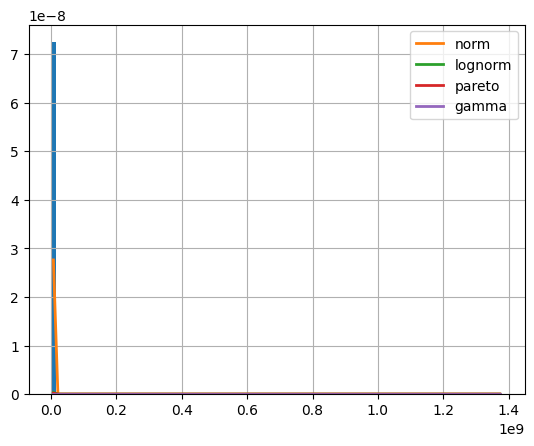

In [19]:

# 4. Ajuste a distribuciones conocidas
fitter = Fitter(precios, distributions=['lognorm', 'gamma', 'pareto', 'norm'])
fitter.fit()

# Mostrar los mejores ajustes
print("\nMejores distribuciones ajustadas:")
print(fitter.summary())


2024-11-18 16:53:14.758 | WARNING  | fitter.fitter:plot_pdf:419 - gamma was not fitted. no parameters available
2024-11-18 16:53:14.760 | WARNING  | fitter.fitter:plot_pdf:419 - lognorm was not fitted. no parameters available
2024-11-18 16:53:14.761 | WARNING  | fitter.fitter:plot_pdf:419 - pareto was not fitted. no parameters available


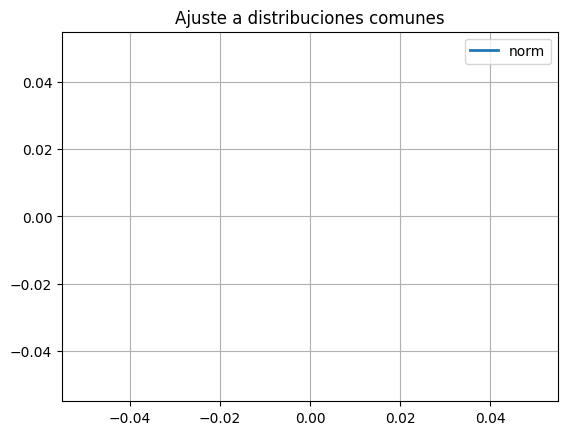

In [9]:

# 5. Visualizar el mejor ajuste
fitter.plot_pdf()
plt.title("Ajuste a distribuciones comunes")
plt.show()


KeyError: 'lognorm'

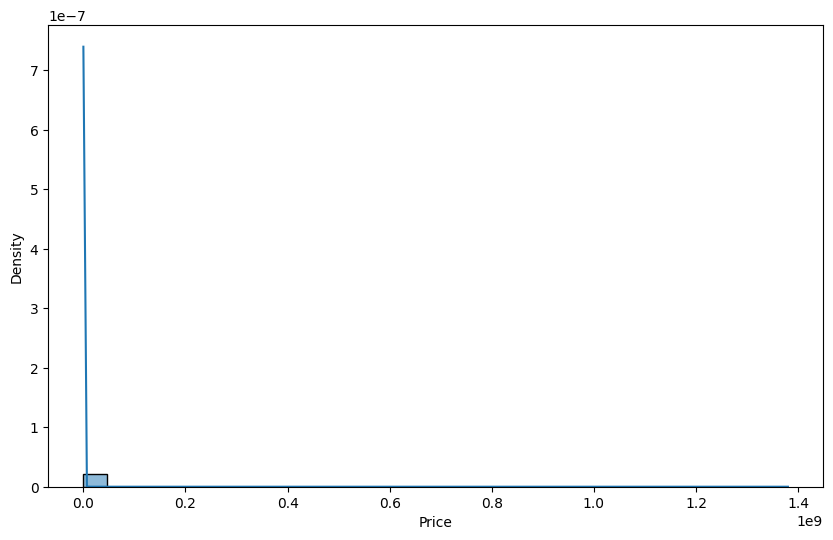

In [10]:

# 6. Comparar con distribuciones específicas (log-normal, gamma, Pareto, normal)
x = np.linspace(min(precios), max(precios), 1000)
plt.figure(figsize=(10, 6))
sns.histplot(precios, kde=True, bins=30, stat="density", label="Datos")
plt.plot(x, lognorm.pdf(x, s=fitter.fitted_param['lognorm'][0],
                        loc=fitter.fitted_param['lognorm'][1],
                        scale=fitter.fitted_param['lognorm'][2]),
         label="Log-Normal", color="blue")
plt.plot(x, gamma.pdf(x, *fitter.fitted_param['gamma']), label="Gamma", color="green")
plt.plot(x, pareto.pdf(x, *fitter.fitted_param['pareto']), label="Pareto", color="red")
plt.title("Comparación con distribuciones ajustadas")
plt.xlabel("Precio")
plt.ylabel("Densidad")
plt.legend()
plt.show()
